In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

## Работаем с датасетом CIFAR-10 


In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Train samples:", X_train.shape, y_train.shape)
print("Test samples:", X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
NUM_CLASSES = 10
cifar10_classes =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Визуализация датасета

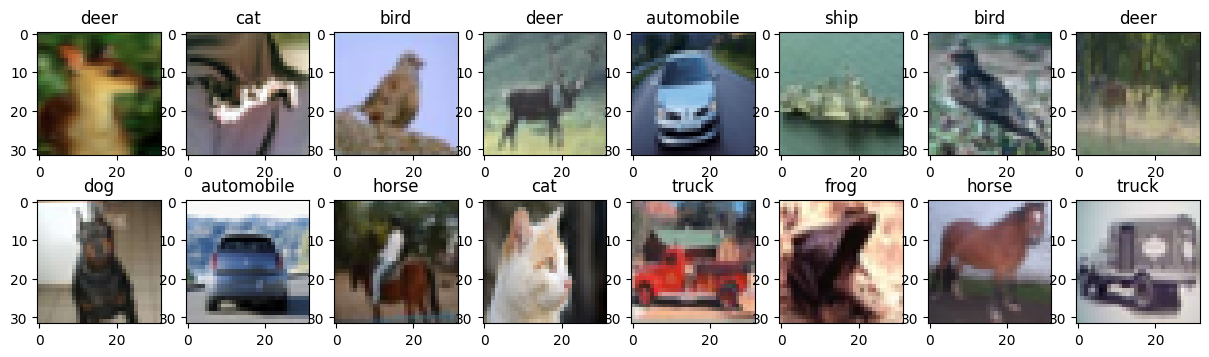

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

### Предобработка данных

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# сохраним исходный целевой вектор тестового набора для дальнейшей визуализации
y_labels = y_test.copy()

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Построение сверточной

Используем следующие слои:

- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - сверточный слой:
    - **filters**: количество обучаемых фильтров (выходных каналов); 
    - **kernel_size**: целое или пара целых чисел, определяющих размер сверточного окна(фильтра);
    - **padding**: padding="same" добавляем рамку из нулей вокруг исходной картинки, таким образом сохраняется размер исходной матрицы, padding='valid' выполняет прохождение фильтров только во внутренней области исходной матрицы, что приводит к поджатию ее размера;
    - **activation**: функция активации "relu", "tanh".
    - **input_shape**: размер исходного тензора (изображения).
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - подвыборка - сжатие результата сверточного слоя для уменьшения количества информации - теряется часть информации о метоположении признака, но сохраняется информация о его наличии.
- [Flatten](https://keras.io/layers/core/#flatten) - векторизация тензора.
- [Dense](https://keras.io/layers/core/#dense) - полносвязный слой.
- [Dropout](https://keras.io/layers/core/#dropout) - регуляризация за счет обнуления части нейронов обученного слоя.

Строим нейросеть, которая принимает на вход тензор изображения __(None, 32, 32, 3)__  и предсказывает  __(None, 10)__ набор вероятностей принадлежности каждого изображения одному из 10 классов. 

__None__ - место оставленное для размера батча(порции изображений).

Воспользуемся глубокими сетями

- свертка - свертка - подвыборка - регуляризация
- свертка - свертка - подвыборка - регуляризация
- свертка - свертка - подвыборка - регуляризация

затем применим полносвязный слой

In [ ]:
my_cifar_model = Sequential()


my_cifar_model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(MaxPooling2D(pool_size=(2,2)))
my_cifar_model.add(Dropout(0.2))


my_cifar_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(MaxPooling2D(pool_size=(2,2)))
my_cifar_model.add(Dropout(0.3))


my_cifar_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
my_cifar_model.add(layers.BatchNormalization())
my_cifar_model.add(MaxPooling2D(pool_size=(2,2)))
my_cifar_model.add(Dropout(0.4))

 
my_cifar_model.add(Flatten())
my_cifar_model.add(Dense(256, activation='relu'))
my_cifar_model.add(Dropout(0.5))
my_cifar_model.add(Dense(NUM_CLASSES, activation='softmax'))

## Оценка модели на тестовых данных

In [ ]:
my_cifar_model.compile(
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

my_cifar_model.fit(X_train, y_train,
             batch_size = 64,
             epochs = 50,
             validation_data=(X_test,y_test))

my_cifar_model.evaluate(X_test, y_test)

my_cifar_model.evaluate(X_test, y_test)

313/313 [==============================] - 20s 64ms/step - loss: 0.5936 - accuracy: 0.8055


[0.6021645069122314, 0.8032000064849854]

### Вектора предсказания классов и вероятностей приналежности к классам

In [ ]:
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_maxprob = np.max(y_pred_test, axis=1)

y_pred_test_classes[0], y_pred_test_maxprob[0]

(3, 0.939232)

### Визуализация матрицы ошибок

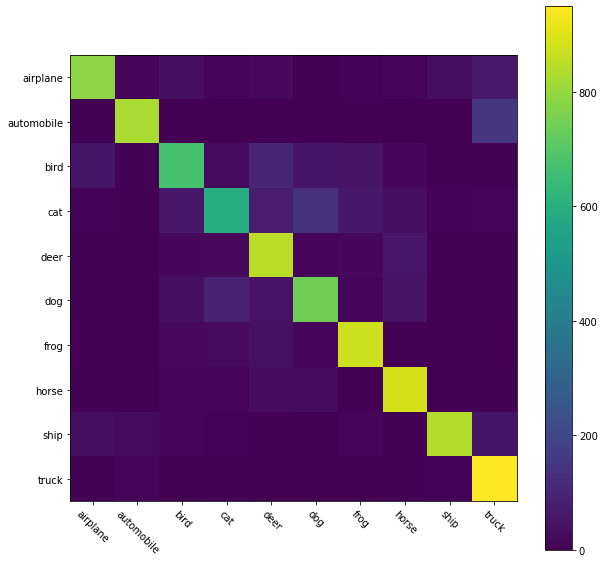

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix(y_labels, y_pred_test_classes))

plt.xticks(np.arange(10), cifar10_classes,rotation = -45)
plt.yticks(np.arange(10), cifar10_classes)

plt.colorbar()
plt.show()

### Визуализация уверенности сети в классификации

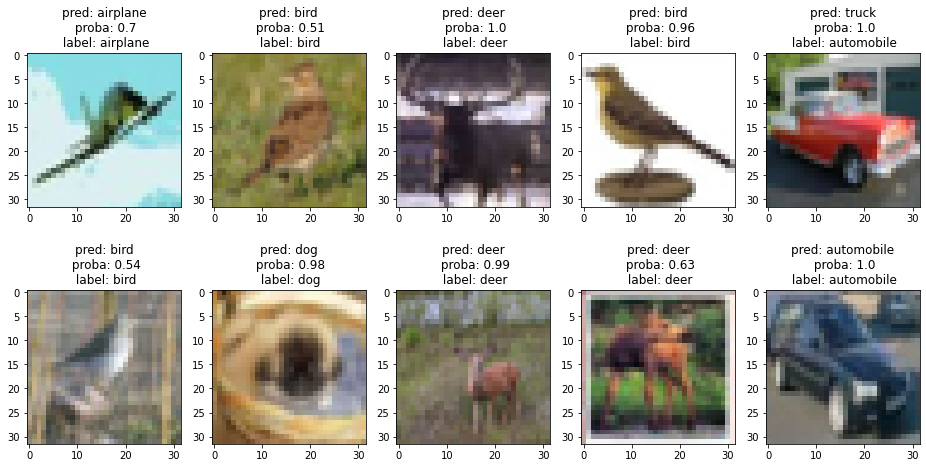

In [ ]:
fig = plt.figure(figsize=(16,8))

for i in range(5):
    for j in range(2):
        random_index = np.random.randint(0,len(y_labels))
        ax = fig.add_subplot(2,5, i*2 + j + 1)
        ax.imshow(X_test[random_index])

        pred = cifar10_classes[y_pred_test_classes[random_index]]
        proba = y_pred_test_maxprob[random_index]
        lbl = cifar10_classes[y_labels[random_index,0]]
        ax.set_title("pred: {}\n proba: {:.2}\n label: {}".format(pred,proba,lbl))

plt.show()